In [1]:
#Importing the neccesary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#Loading the data
df=pd.read_csv("Data file.csv")

In [3]:
df.columns

Index(['Unnamed: 0', 'label', 'msisdn', 'aon', 'daily_decr30', 'daily_decr90',
       'rental30', 'rental90', 'last_rech_date_ma', 'last_rech_date_da',
       'last_rech_amt_ma', 'cnt_ma_rech30', 'fr_ma_rech30',
       'sumamnt_ma_rech30', 'medianamnt_ma_rech30', 'medianmarechprebal30',
       'cnt_ma_rech90', 'fr_ma_rech90', 'sumamnt_ma_rech90',
       'medianamnt_ma_rech90', 'medianmarechprebal90', 'cnt_da_rech30',
       'fr_da_rech30', 'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30',
       'amnt_loans30', 'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90',
       'amnt_loans90', 'maxamnt_loans90', 'medianamnt_loans90', 'payback30',
       'payback90', 'pcircle', 'pdate'],
      dtype='object')

In [3]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [6]:
df.describe()

#Summary statistics shows all the statistics of our dataset i.e. mean, median and other calculation.
#Mean is greater than median in all the columns so aur data is right skewed.
#The difference between 75% and maximum is higher that's why outliers are removed which needs to be removed.
#The pdate column tells the date when the data is collected. It contains only three month data.

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.84780,3712.202921,2064.452797,3.978057,...,2.758981,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485
std,0.330519,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.89223,53374.833430,2370.786034,4.256090,...,2.554502,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108
min,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.00000,-29.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.00000,0.000000,770.000000,1.000000,...,1.000000,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000
50%,1.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.00000,0.000000,1539.000000,3.000000,...,2.000000,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667
75%,1.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.00000,0.000000,2309.000000,5.000000,...,4.000000,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000
max,1.000000,999860.755200,265926.000000,320630.000000,198926.110000,200148.110000,998650.37770,999171.809400,55000.000000,203.000000,...,50.000000,306.000000,99864.560860,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000


In [7]:
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [8]:
#Analysing Object Columns

c1=(df.dtypes=="object")
cat_col=list(c1[c1].index)
print("Categorical Variables",len(cat_col))

Categorical Variables 3


In [9]:
c2=(df.dtypes=="int64")
num_col=list(c2[c2].index)
print("Numerical Variables",len(num_col))

Numerical Variables 12


In [10]:
c3=(df.dtypes=="float64")
float_col=list(c3[c3].index)
print("Float Variables",len(float_col))

Float Variables 21


In [4]:
#Converting policy bind date and incident date to day,month,year format

df["pdate"]=pd.to_datetime(df['pdate'])
df["pdate_month"]=df["pdate"].apply(lambda x:x.month)
df["pdate_day"]=df["pdate"].apply(lambda x:x.day)
df["pdate_year"]=df["pdate"].apply(lambda x:x.year)

In [5]:
df.drop("pdate",axis=1,inplace=True)

In [6]:
#Target is not balanced

df["label"].value_counts()

1    183431
0     26162
Name: label, dtype: int64

In [14]:
df["pcircle"].unique()

array(['UPW'], dtype=object)

In [15]:
for i in df.columns.values:
    if df[i].dtype=="O":
        print("The unique values of column ",i,"are",len(df[i].unique()))

The unique values of column  msisdn are 186243
The unique values of column  pcircle are 1


In [7]:
#msisdn denotes the mobile number of the customer which is unique hence eliminating the column
#all the entries are for the year 2016 hence removing the year column
#pcircle is the telecom circle which has only one value-"UPW", hence deleting the column

df.drop(columns=["msisdn","pdate_year","pcircle"],axis=1,inplace=True)

In [35]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_month,pdate_day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


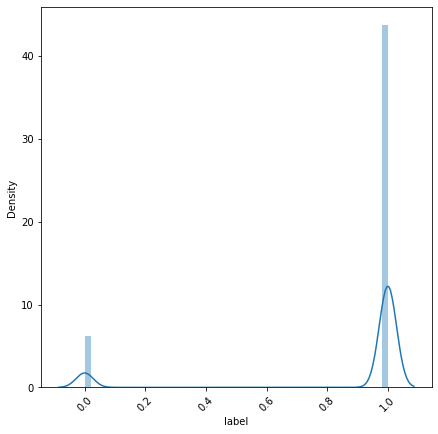

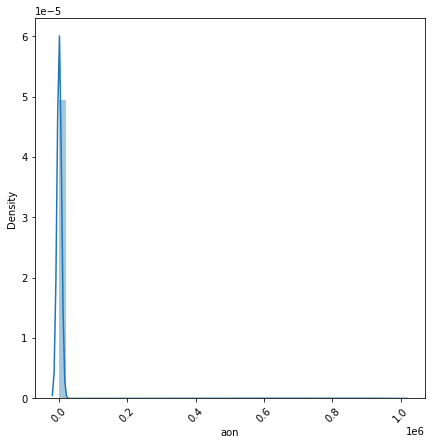

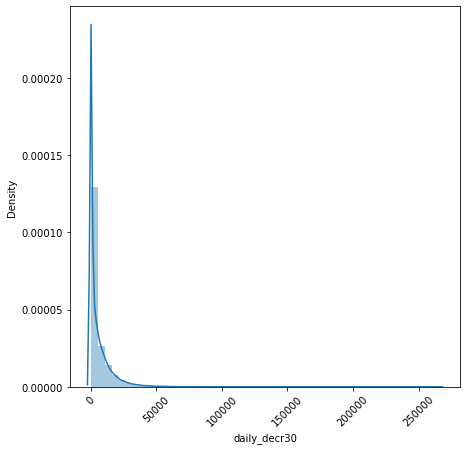

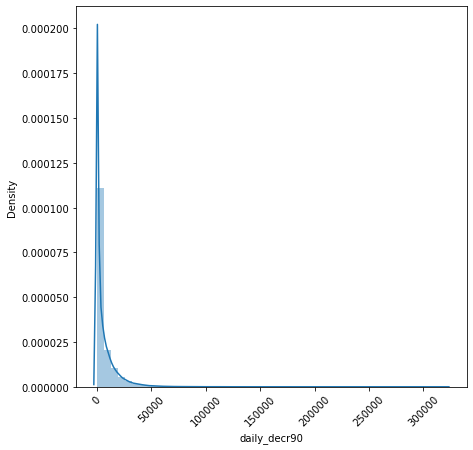

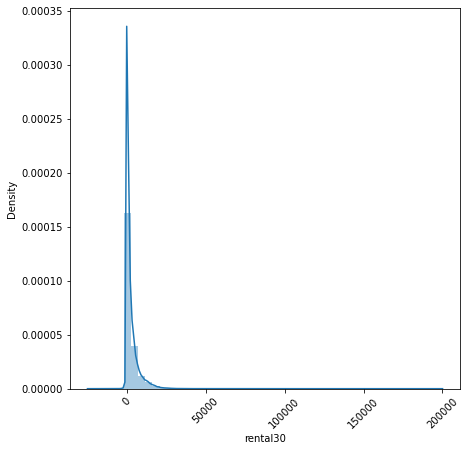

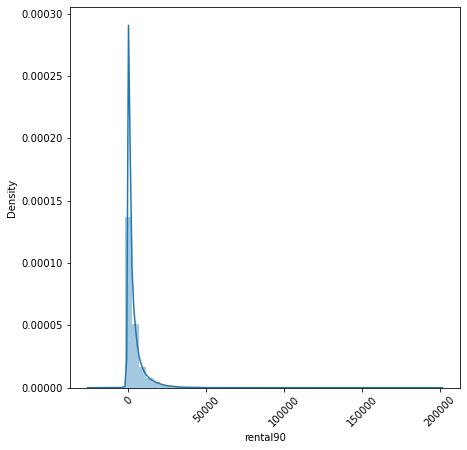

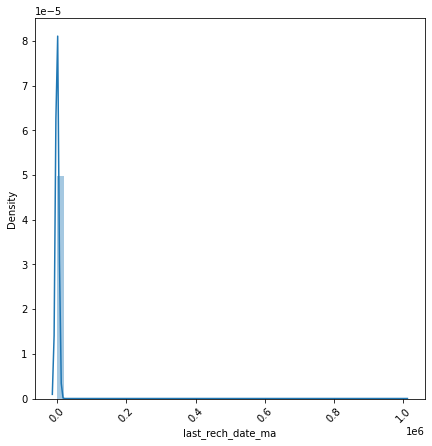

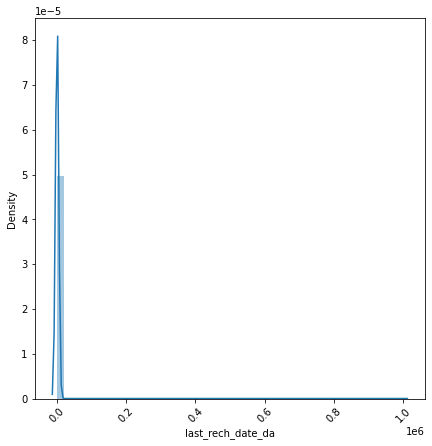

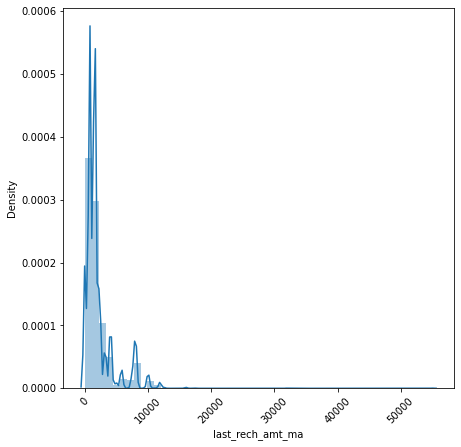

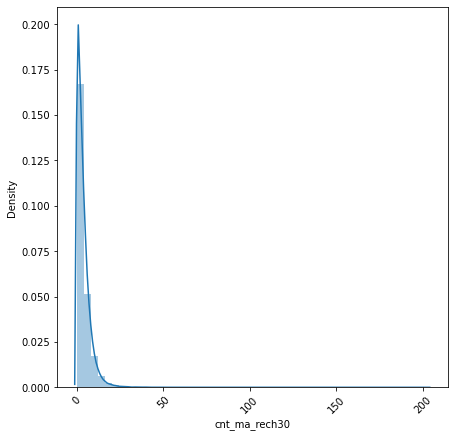

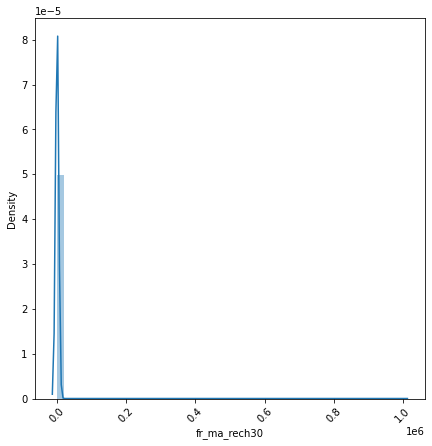

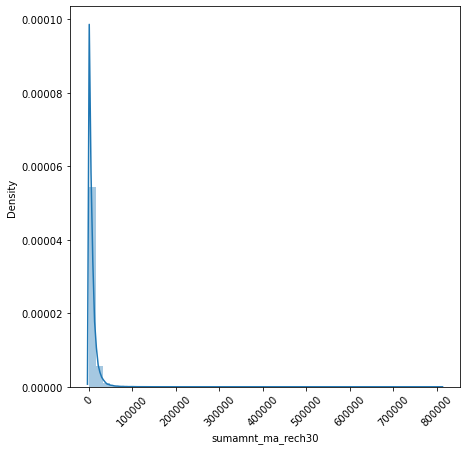

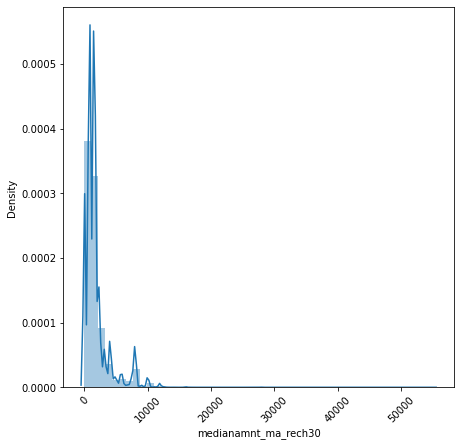

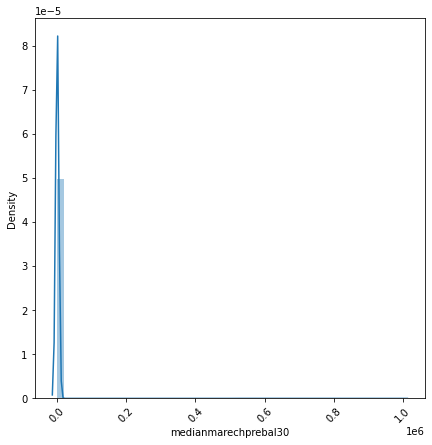

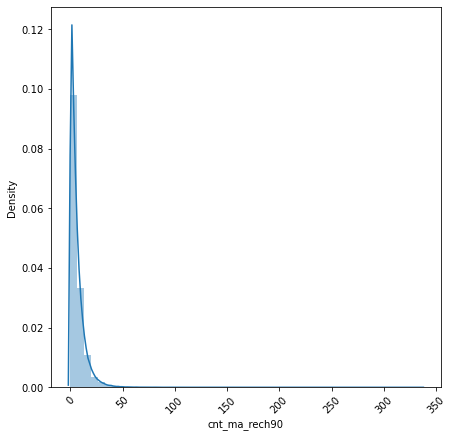

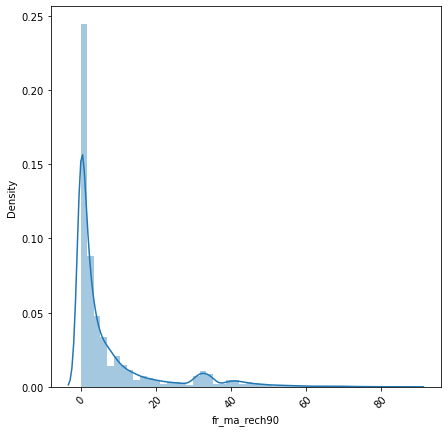

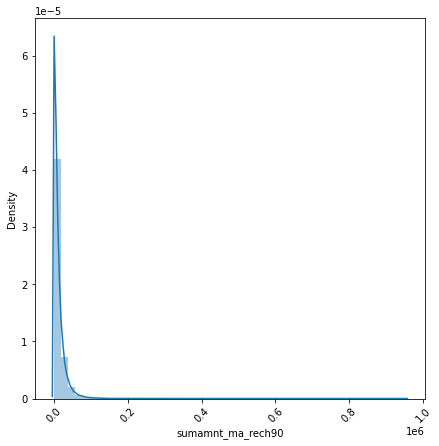

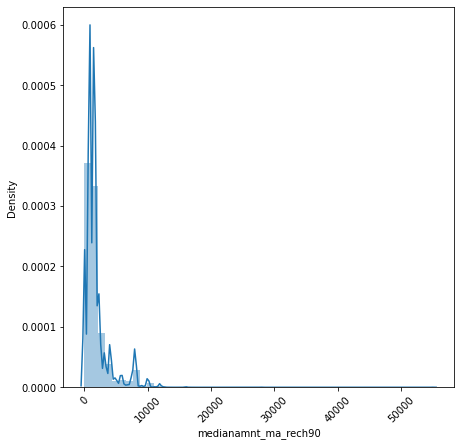

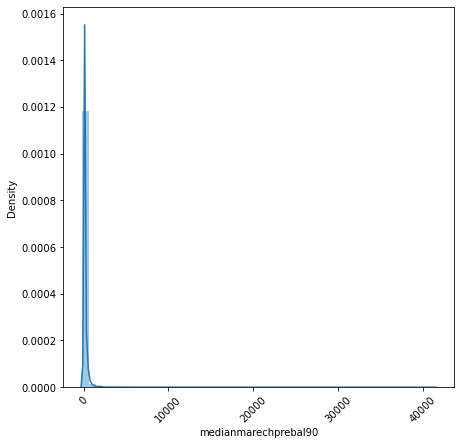

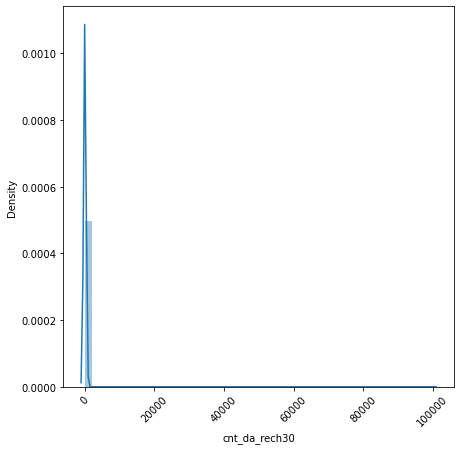

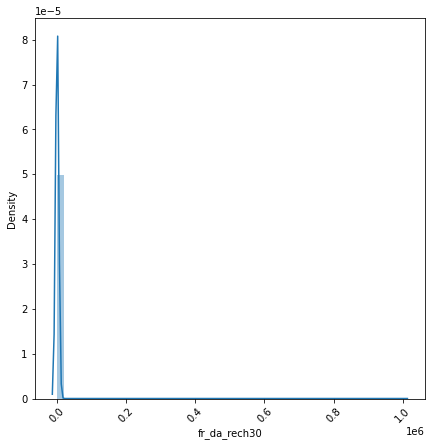

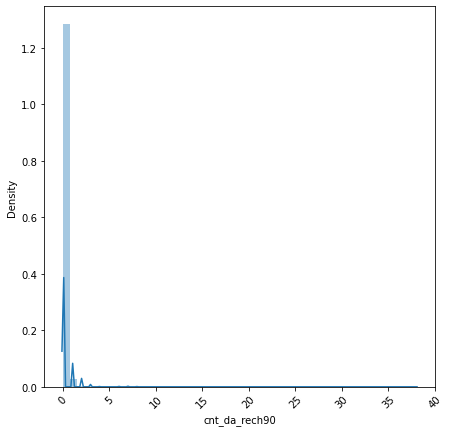

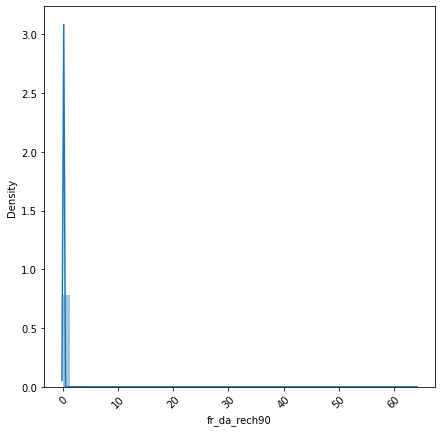

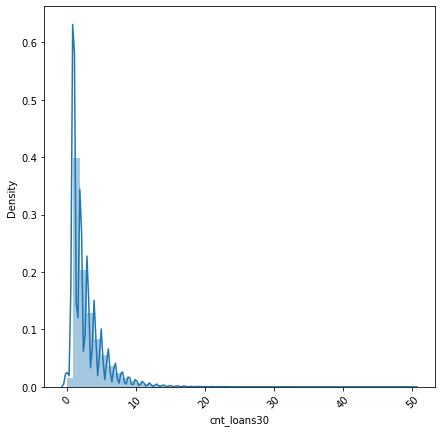

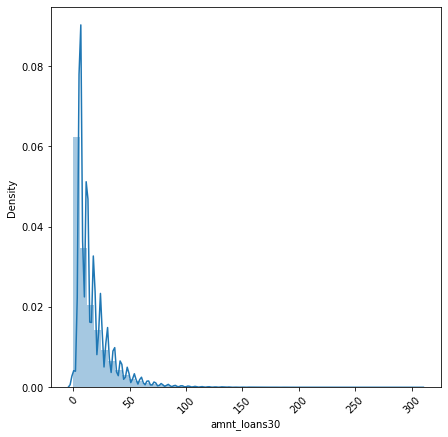

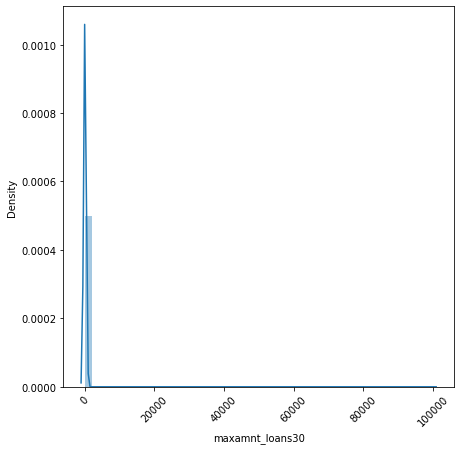

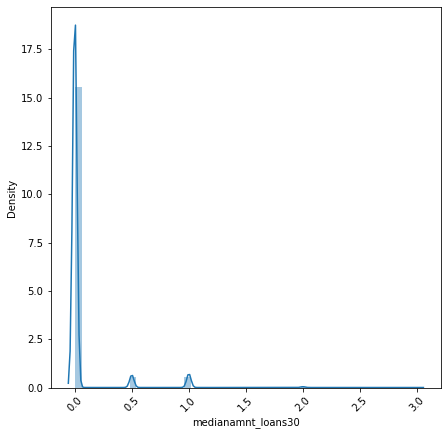

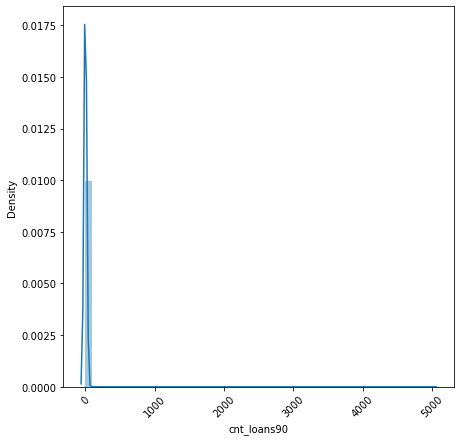

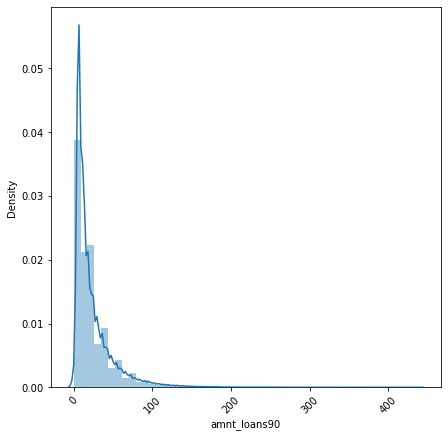

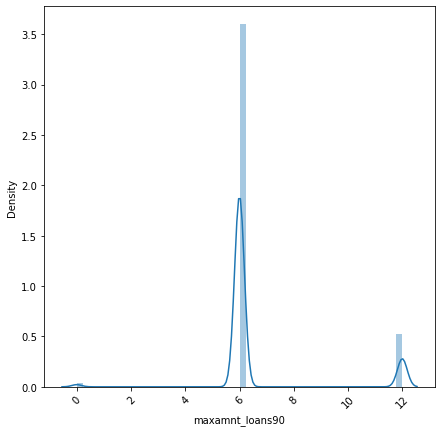

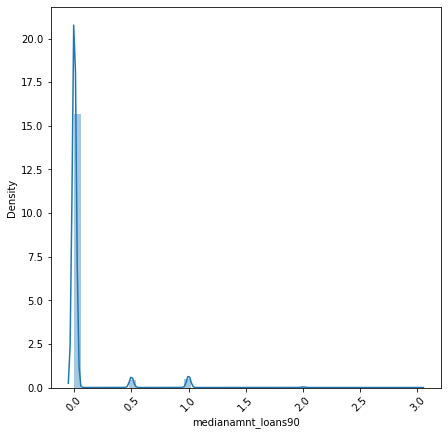

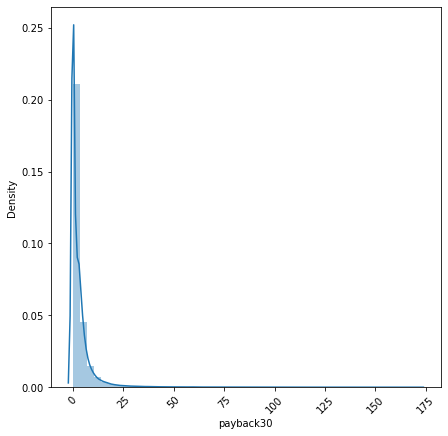

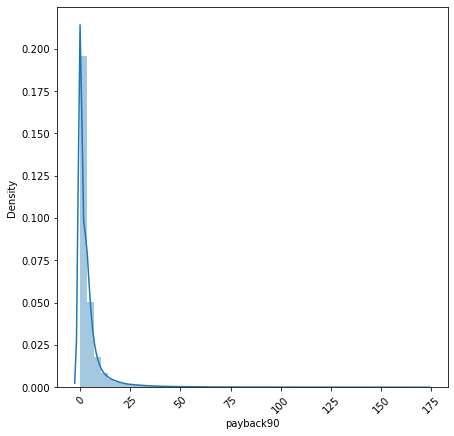

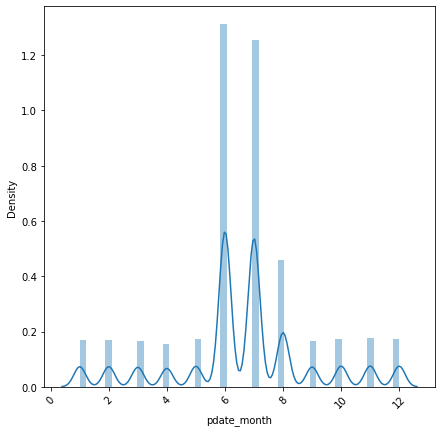

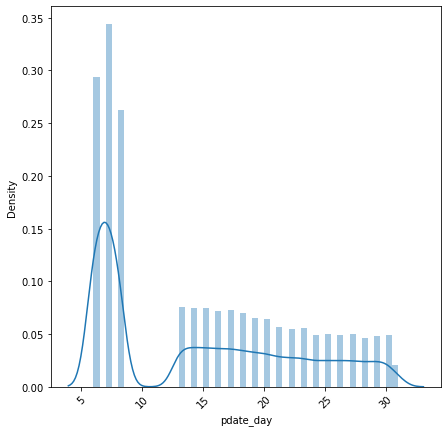

In [110]:
for i in df.columns.values:
    plt.figure(figsize=(7,7))
    sns.distplot(df[i])
    plt.xlabel(i,fontsize=10)
    plt.xticks(rotation=45)
    plt.show()
    
#Most of the distributions have paid back the loan.


In [111]:
df.columns

Index(['label', 'aon', 'daily_decr30', 'daily_decr90', 'rental30', 'rental90',
       'last_rech_date_ma', 'last_rech_date_da', 'last_rech_amt_ma',
       'cnt_ma_rech30', 'fr_ma_rech30', 'sumamnt_ma_rech30',
       'medianamnt_ma_rech30', 'medianmarechprebal30', 'cnt_ma_rech90',
       'fr_ma_rech90', 'sumamnt_ma_rech90', 'medianamnt_ma_rech90',
       'medianmarechprebal90', 'cnt_da_rech30', 'fr_da_rech30',
       'cnt_da_rech90', 'fr_da_rech90', 'cnt_loans30', 'amnt_loans30',
       'maxamnt_loans30', 'medianamnt_loans30', 'cnt_loans90', 'amnt_loans90',
       'maxamnt_loans90', 'medianamnt_loans90', 'payback30', 'payback90',
       'pdate_month', 'pdate_day'],
      dtype='object')

In [116]:
df

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_month,pdate_day
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7,20
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,10,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8,19
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,6,17
209589,1,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,12,6
209590,1,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,7,29
209591,1,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,7,25


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 35 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   aon                   209593 non-null  float64
 2   daily_decr30          209593 non-null  float64
 3   daily_decr90          209593 non-null  float64
 4   rental30              209593 non-null  float64
 5   rental90              209593 non-null  float64
 6   last_rech_date_ma     209593 non-null  float64
 7   last_rech_date_da     209593 non-null  float64
 8   last_rech_amt_ma      209593 non-null  int64  
 9   cnt_ma_rech30         209593 non-null  int64  
 10  fr_ma_rech30          209593 non-null  float64
 11  sumamnt_ma_rech30     209593 non-null  float64
 12  medianamnt_ma_rech30  209593 non-null  float64
 13  medianmarechprebal30  209593 non-null  float64
 14  cnt_ma_rech90         209593 non-null  int64  
 15  

<AxesSubplot:>

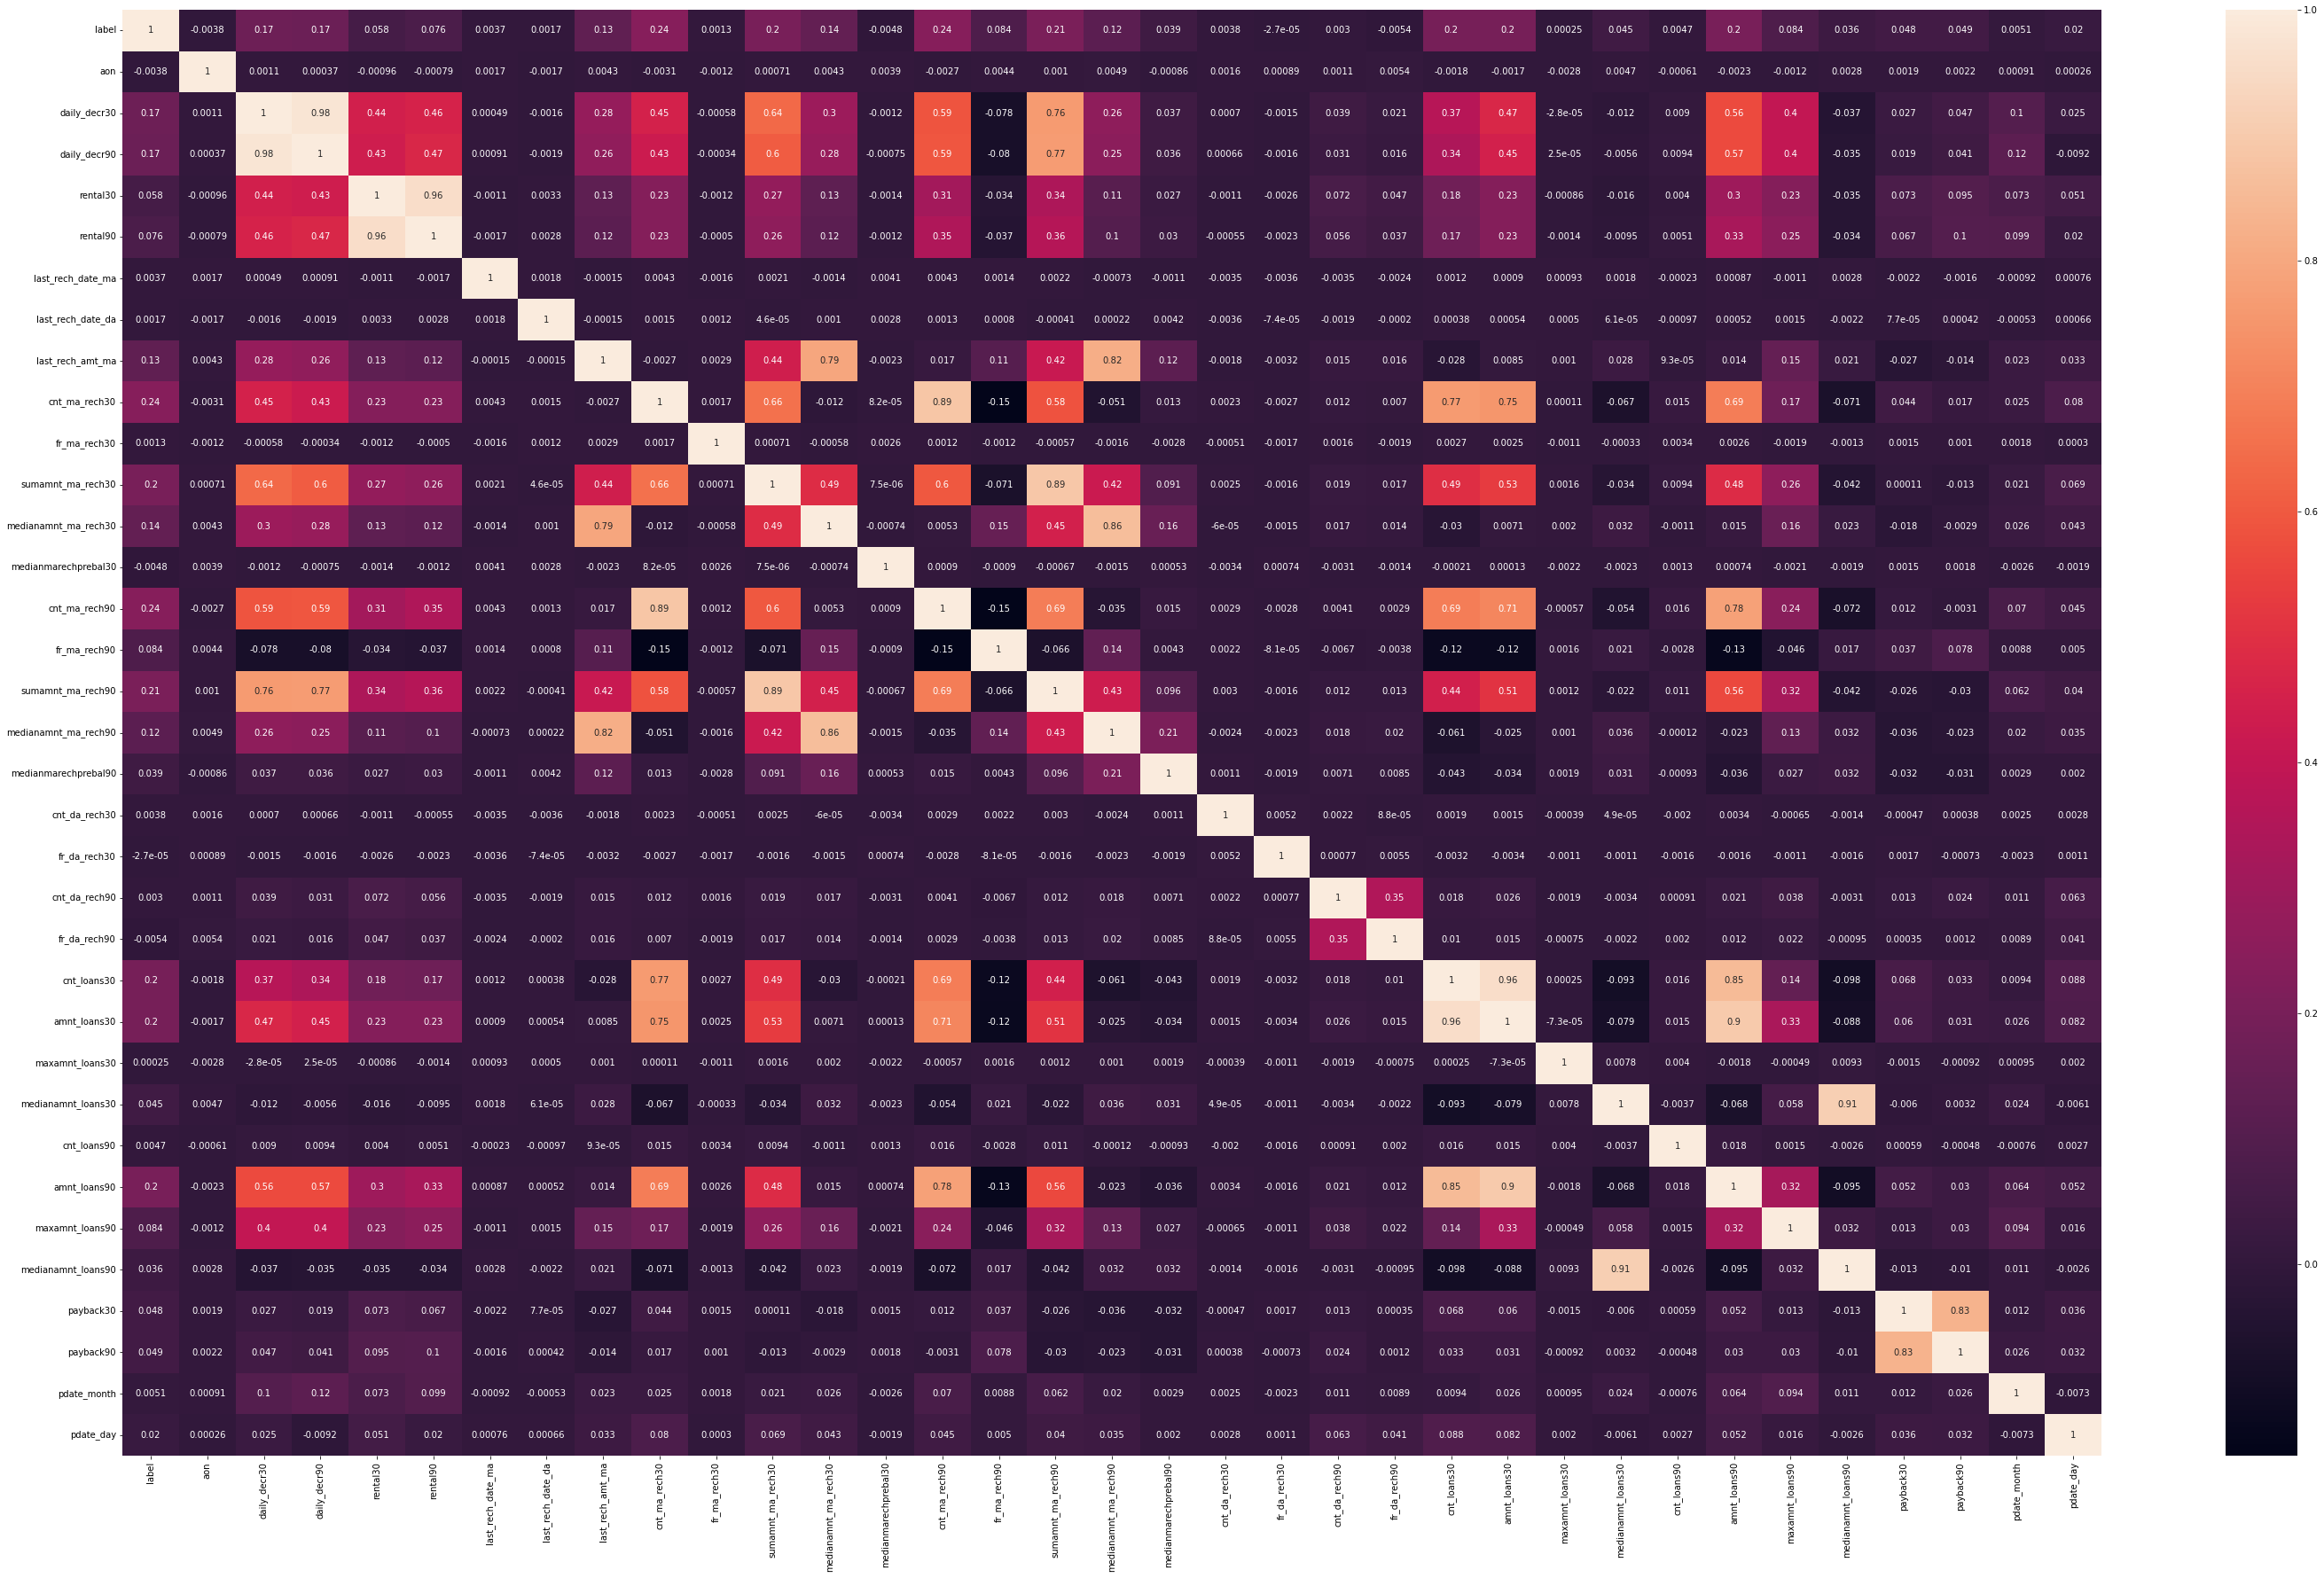

In [124]:
#Checking Correlation by plotting heatmap
plt.figure(figsize=(50,30))
sns.heatmap(df.corr(),annot=True)

In [8]:
#Dropping the columns which is highly correlated with each other do avoid multicolinearity problem.
df.drop(columns=['daily_decr30','rental30','amnt_loans30','medianamnt_loans30'],axis=1, inplace = True)

label                      AxesSubplot(0.125,0.125;0.0209459x0.755)
aon                     AxesSubplot(0.150135,0.125;0.0209459x0.755)
daily_decr90             AxesSubplot(0.17527,0.125;0.0209459x0.755)
rental90                AxesSubplot(0.200405,0.125;0.0209459x0.755)
last_rech_date_ma       AxesSubplot(0.225541,0.125;0.0209459x0.755)
last_rech_date_da       AxesSubplot(0.250676,0.125;0.0209459x0.755)
last_rech_amt_ma        AxesSubplot(0.275811,0.125;0.0209459x0.755)
cnt_ma_rech30           AxesSubplot(0.300946,0.125;0.0209459x0.755)
fr_ma_rech30            AxesSubplot(0.326081,0.125;0.0209459x0.755)
sumamnt_ma_rech30       AxesSubplot(0.351216,0.125;0.0209459x0.755)
medianamnt_ma_rech30    AxesSubplot(0.376351,0.125;0.0209459x0.755)
medianmarechprebal30    AxesSubplot(0.401486,0.125;0.0209459x0.755)
cnt_ma_rech90           AxesSubplot(0.426622,0.125;0.0209459x0.755)
fr_ma_rech90            AxesSubplot(0.451757,0.125;0.0209459x0.755)
sumamnt_ma_rech90       AxesSubplot(0.476892,0.1

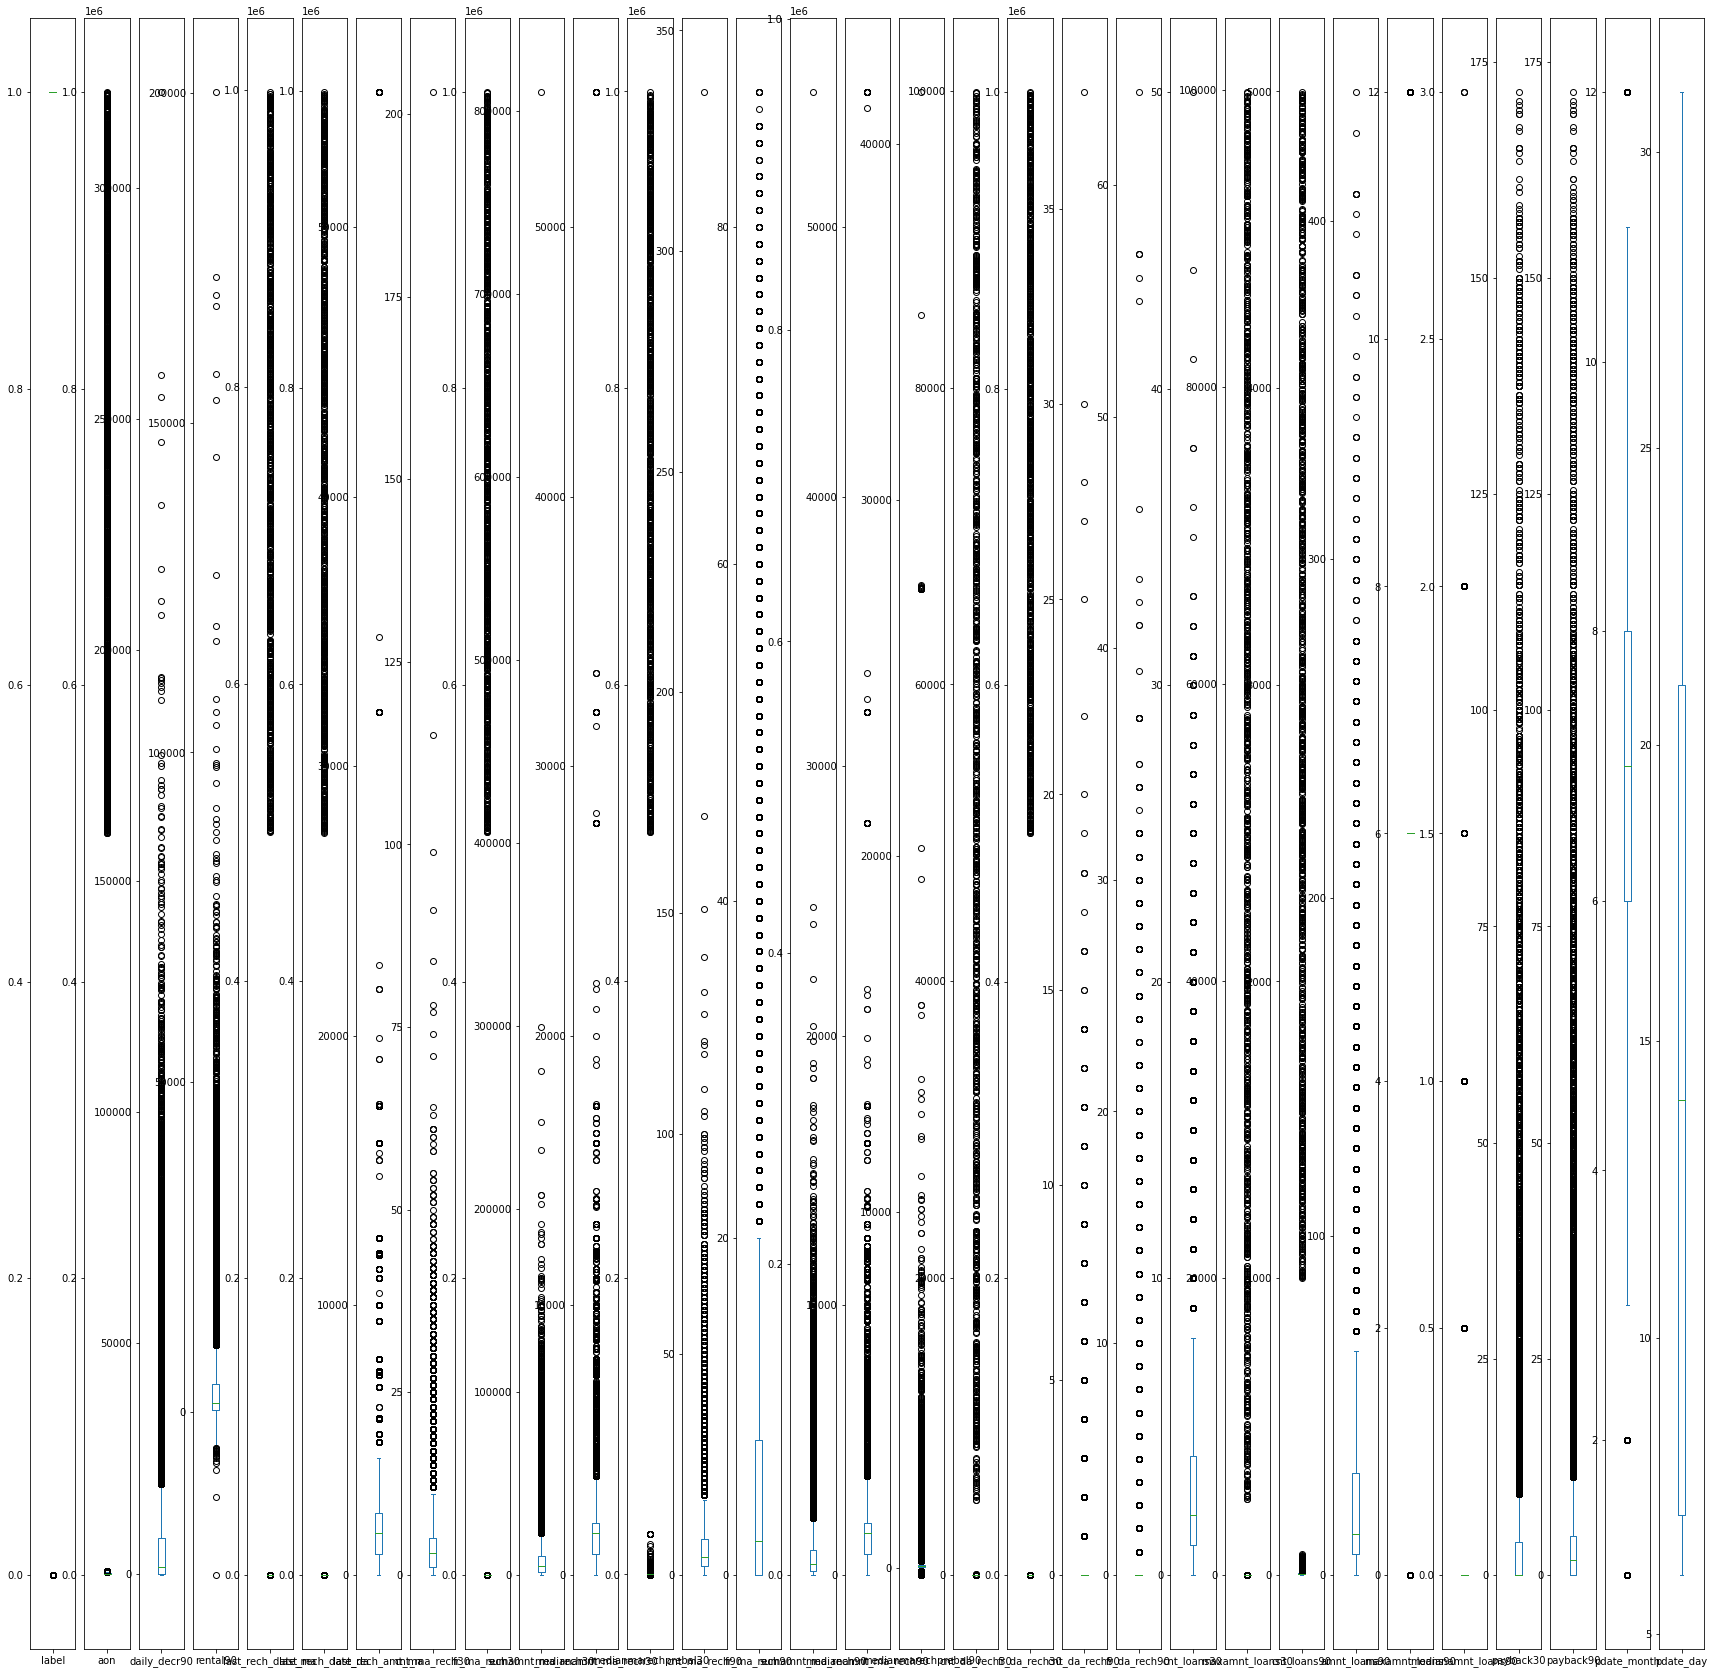

In [9]:
#Plotting a box plot to check the outliers

df.plot(kind='box',subplots=True,figsize=(30,30))

In [10]:
#Checking Z-Score for Outliers
from scipy import stats
clist=df.columns.values

z1=abs(stats.zscore(df[clist]))

In [11]:
x=np.where(z1>3)
x

(array([    21,     22,     22, ..., 209581, 209586, 209587], dtype=int64),
 array([13, 13, 28, ...,  2, 24, 26], dtype=int64))

In [12]:
df_z=df[(z1 < 3).all(axis=1)]

In [13]:
print(df.shape,df_z.shape)

(209593, 31) (163619, 31)


In [14]:
#%data loss
a=(df.shape[0]-df_z.shape[0])/df.shape[0]
print(round(a*100,2))

21.93


In [132]:
#Checking correlation of features with the target
df_z.corr()["label"].sort_values(ascending=False)

label                   1.000000
cnt_ma_rech90           0.294089
cnt_ma_rech30           0.291953
sumamnt_ma_rech90       0.271692
sumamnt_ma_rech30       0.269227
amnt_loans90            0.246632
cnt_loans90             0.244773
cnt_loans30             0.238164
daily_decr90            0.192546
medianamnt_ma_rech30    0.171125
fr_ma_rech30            0.165094
last_rech_amt_ma        0.159459
medianamnt_ma_rech90    0.148758
payback30               0.141942
payback90               0.141326
fr_ma_rech90            0.124616
medianmarechprebal90    0.123948
medianmarechprebal30    0.117022
maxamnt_loans90         0.090860
aon                     0.085894
rental90                0.067980
medianamnt_loans90      0.032194
last_rech_date_da       0.026184
cnt_da_rech90           0.025145
pdate_day               0.025108
maxamnt_loans30         0.002667
pdate_month             0.001277
cnt_da_rech30           0.000351
last_rech_date_ma      -0.095993
fr_da_rech30                 NaN
fr_da_rech

In [45]:
df["label"].value_counts()

1    183431
0     26162
Name: label, dtype: int64

##### Balancing the target variable

In [15]:
from sklearn.utils import resample
dfminor_output=df[(df["label"]==0)]
dfmajor_output=df[(df["label"]==1)]
dfmin_up=resample(dfminor_output,replace=True,n_samples=183431,random_state=42)
df_up=pd.concat([dfmin_up,dfmajor_output])

In [16]:
df_up["label"].value_counts()

0    183431
1    183431
Name: label, dtype: int64

#### Splitting data into features and target

In [18]:
df_copy=df_up.copy()

In [19]:
X=df_copy.drop("label",axis=1)
Y=df_copy[["label"]]

In [20]:
#Scaling the features

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
x=scaler.fit_transform(X)

X_s=pd.DataFrame(x,columns=X.columns)

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X_s,Y,random_state=4,test_size=0.20)

from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score

In [22]:
rf=RandomForestClassifier()

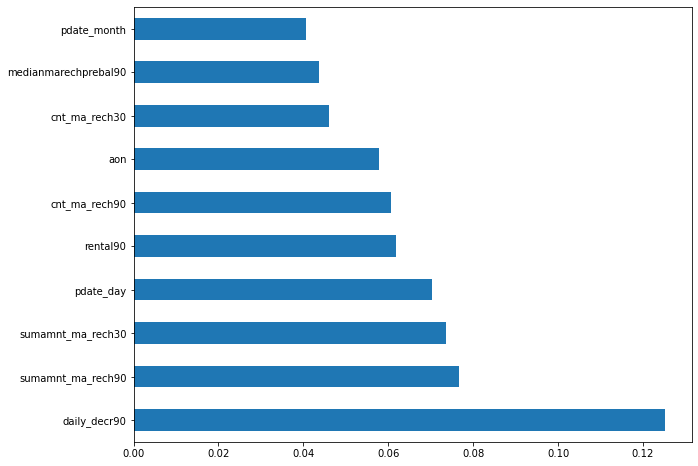

In [53]:
model=rf.fit(x_train,y_train)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X_s.columns)
plt.figure(figsize=(10,8))
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
       

In [23]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
selection=SelectKBest(score_func=chi2)
fit=selection.fit(X_s,Y)

In [24]:
from sklearn.decomposition import PCA
pca=PCA().fit(X_s)

In [25]:
X_s

,aon,daily_decr90,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,...,cnt_loans30,maxamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate_month,pdate_day
0,0.000972,0.012610,0.112017,0.000049,0.000029,0.027982,0.004926,0.000000,0.001900,0.027982,...,0.02,0.00006,0.000400,0.027397,0.5,0.0,0.000000,0.026239,0.545455,0.52
1,0.000217,0.008935,0.146971,0.000032,0.000029,0.014000,0.014778,0.000007,0.002859,0.014055,...,0.02,0.00012,0.000200,0.027397,1.0,0.0,0.000000,0.000000,0.545455,0.44
2,0.000409,0.000290,0.110034,0.000029,0.000029,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.02,0.00006,0.000200,0.013699,0.5,0.0,0.000000,0.000000,0.090909,0.00
3,0.001213,0.000310,0.110044,0.000037,0.000029,0.028127,0.004926,0.000000,0.001910,0.028127,...,0.02,0.00006,0.000200,0.013699,0.5,0.0,0.000000,0.000000,0.454545,0.28
4,0.000632,0.016013,0.116073,0.000038,0.000029,0.014000,0.019704,0.000012,0.005701,0.020991,...,0.06,0.00006,0.001000,0.068493,0.5,0.0,0.033042,0.029155,0.545455,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366857,0.000452,0.000764,0.114777,0.000030,0.000029,0.073600,0.014778,0.000002,0.012843,0.057782,...,0.04,0.00006,0.000400,0.027397,0.5,0.0,0.005831,0.005831,0.454545,0.44
366858,0.001123,0.000405,0.117619,0.000033,0.000029,0.014055,0.019704,0.000001,0.003817,0.014055,...,0.06,0.00006,0.000600,0.041096,0.5,0.0,0.005831,0.005831,1.000000,0.00
366859,0.001061,0.037407,0.149482,0.000032,0.000029,0.027982,0.024631,0.000008,0.011522,0.027982,...,0.08,0.00012,0.001201,0.123288,1.0,0.0,0.023324,0.022352,0.545455,0.92
366860,0.001780,0.039496,0.114312,0.000031,0.000067,0.014055,0.024631,0.000004,0.015003,0.014055,...,0.04,0.00012,0.000600,0.054795,1.0,0.0,0.000000,0.061224,0.545455,0.76


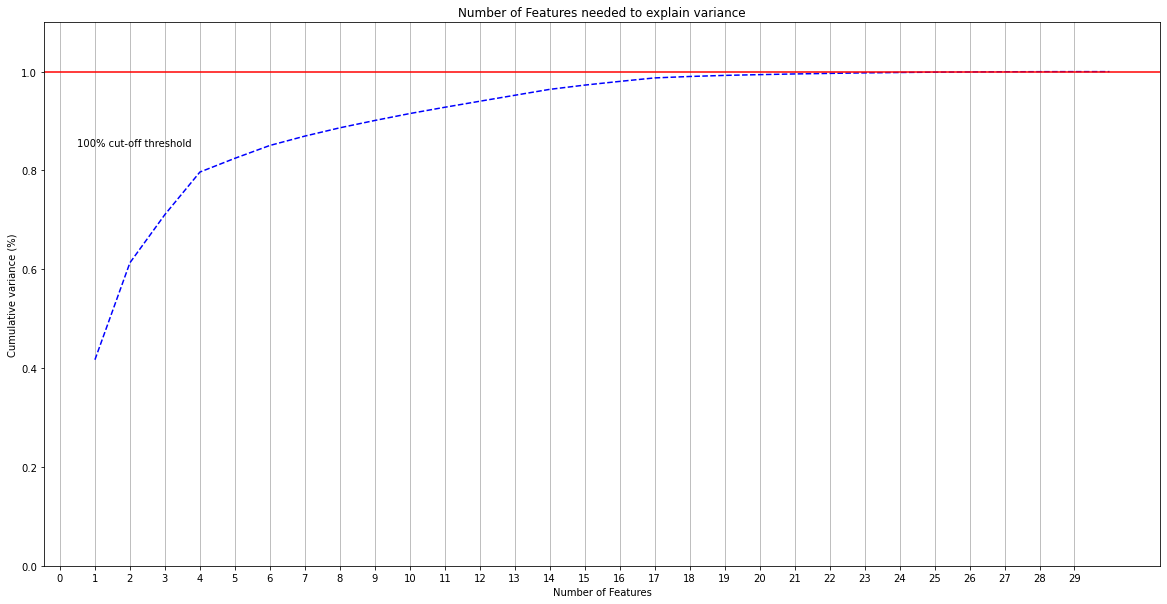

In [56]:
fig, ax = plt.subplots(figsize=(20,10))
xi = np.arange(1,31, step=1)
yi = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, yi, linestyle='--', color='b')

plt.xlabel('Number of Features')
plt.xticks(np.arange(0,30, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('Number of Features needed to explain variance')


plt.axhline(y=1, color='r', linestyle='-')
plt.text(0.5, 0.85, '100% cut-off threshold')

ax.grid(axis='x')
plt.show()

#From the below graph, we can retain all the information with 21 features

In [26]:
pca=PCA(n_components=21)
x=pca.fit_transform(X_s)

pd.DataFrame(x)

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,0.179796,0.039374,-0.053817,-0.031734,-0.010142,-0.006700,-0.014060,-0.003034,-0.017248,-0.005871,...,-0.004077,-0.005364,-0.000972,-0.002742,-0.002090,-0.002383,0.009501,0.013684,-0.014636,0.002358
1,0.103701,0.088011,0.430002,-0.092182,-0.061328,-0.002357,-0.104568,-0.048709,-0.029462,-0.005839,...,-0.002859,-0.005689,-0.000989,-0.001512,-0.001863,-0.001790,-0.001864,-0.002268,0.019105,-0.005702
2,-0.315530,-0.441911,-0.001337,-0.061838,-0.019087,-0.006622,-0.030788,-0.031556,-0.002805,-0.005087,...,-0.003332,-0.005115,-0.001321,-0.002845,-0.002347,-0.002286,0.002422,-0.000029,-0.004203,0.000892
3,-0.055684,-0.065740,-0.043807,-0.071702,-0.025540,-0.004930,-0.019835,0.005360,-0.023997,-0.006534,...,-0.003753,-0.005068,-0.000677,-0.002725,-0.002134,-0.002211,-0.006763,0.001290,-0.005008,-0.002091
4,0.301425,0.048867,-0.045604,0.022137,0.018443,-0.009995,0.026044,-0.024921,0.010853,-0.003558,...,-0.004540,-0.005720,-0.001804,-0.003153,-0.002182,-0.002756,-0.004897,-0.006261,-0.008469,-0.005345
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
366857,0.105555,-0.054831,-0.036112,-0.046625,-0.016369,-0.006230,0.019892,0.049903,-0.039414,-0.007864,...,-0.004374,-0.004967,0.000038,-0.002909,-0.002075,-0.002259,-0.016240,0.003086,0.001620,0.003757
366858,-0.364429,0.461816,-0.093769,-0.061046,-0.010569,-0.006695,0.014564,-0.024580,0.006942,-0.003134,...,-0.004171,-0.004818,-0.001561,-0.003528,-0.002022,-0.002625,-0.019553,0.003132,0.003718,-0.004658
366859,0.585891,0.119366,0.446792,-0.041884,-0.017757,-0.005751,-0.008332,-0.051650,0.005858,-0.003235,...,-0.004206,-0.006452,-0.002081,-0.002508,-0.001837,-0.002292,-0.001653,-0.004512,0.011218,-0.001957
366860,0.424940,0.108408,0.435593,-0.047650,-0.016166,-0.004419,-0.077379,-0.041867,-0.024044,-0.005390,...,-0.003546,-0.005902,-0.001160,-0.001653,-0.001686,-0.001832,0.003033,0.036195,-0.022648,-0.004142


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score,roc_auc_score

In [28]:
lr=LogisticRegression()
rf=RandomForestClassifier()
dt=DecisionTreeClassifier(criterion='entropy')
gb=GaussianNB()

# Train-Test-Split

In [29]:
x_train,x_test,y_train,y_test=train_test_split(x,Y,random_state=4,test_size=0.30)

# Logistic Regression

In [61]:
model1=lr.fit(x_train,y_train)

In [62]:
pred_test=model1.predict(x_test)
pred_train=model1.predict(x_train)

In [63]:
print("Logistic Regression Model for Random State has Accuracy Score-Test",round(accuracy_score(y_test,pred_test),2),"Accuracy Score-Train",round(accuracy_score(y_train,pred_train),2),"F1 score-train",round(f1_score(y_train,pred_train,average='weighted'),2),"F1 score -test",round(f1_score(y_test,pred_test,average='weighted'),2))

Logistic Regression Model for Random State has Accuracy Score-Test 0.74 Accuracy Score-Train 0.74 F1 score-train 0.74 F1 score -test 0.74


In [64]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.71      0.82      0.76     55009
           1       0.78      0.66      0.72     55050

    accuracy                           0.74    110059
   macro avg       0.74      0.74      0.74    110059
weighted avg       0.74      0.74      0.74    110059



In [65]:
print(confusion_matrix(y_test,pred_test))

[[44833 10176]
 [18568 36482]]


# Random Forest Classifier

In [30]:
model2=rf.fit(x_train,y_train)


In [31]:
pred_test=model2.predict(x_test)


In [32]:
pred_train=model2.predict(x_train)

In [33]:
print("Random Forest Classifier Model for Random State has Accuracy Score-Test",round(accuracy_score(y_test,pred_test),2),"Accuracy Score-Train",round(accuracy_score(y_train,pred_train),2),"F1 score-train",round(f1_score(y_train,pred_train,average='weighted'),2),"F1 score -test",round(f1_score(y_test,pred_test,average='weighted'),2))

Random Forest Classifier Model for Random State has Accuracy Score-Test 0.97 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 0.97


In [34]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97     55009
           1       1.00      0.93      0.96     55050

    accuracy                           0.97    110059
   macro avg       0.97      0.97      0.97    110059
weighted avg       0.97      0.97      0.97    110059



In [71]:
print(confusion_matrix(y_test,pred_test))

[[54846   163]
 [ 3591 51459]]


In [72]:
print(round(roc_auc_score(y_test,pred_test),2)*100)

97.0


# Decision Tree Classifier

In [73]:
model5=dt.fit(x_train,y_train)


In [74]:
pred_test=model5.predict(x_test)


In [75]:
pred_train=model5.predict(x_train)

In [76]:
print("Decision Tree Classifier Model for Random State has Accuracy Score-Test",round(accuracy_score(y_test,pred_test),2),"Accuracy Score-Train",round(accuracy_score(y_train,pred_train),2),"F1 score-train",round(f1_score(y_train,pred_train,average='weighted'),2),"F1 score -test",round(f1_score(y_test,pred_test,average='weighted'),2))

Decision Tree Classifier Model for Random State has Accuracy Score-Test 0.95 Accuracy Score-Train 1.0 F1 score-train 1.0 F1 score -test 0.95


In [77]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.90      1.00      0.95     55009
           1       1.00      0.90      0.94     55050

    accuracy                           0.95    110059
   macro avg       0.95      0.95      0.95    110059
weighted avg       0.95      0.95      0.95    110059



In [78]:
print(confusion_matrix(y_test,pred_test))

[[54820   189]
 [ 5773 49277]]


# Gaussian NB Classifier

In [168]:
model6=gb.fit(x_train,y_train)


In [169]:
pred_test=model6.predict(x_test)


In [170]:
pred_train=model6.predict(x_train)

In [171]:
print("Gaussian NB Classifier Model for Random State has Accuracy Score-Test",round(accuracy_score(y_test,pred_test),2),"Accuracy Score-Train",round(accuracy_score(y_train,pred_train),2),"F1 score-train",round(f1_score(y_train,pred_train,average='weighted'),2),"F1 score -test",round(f1_score(y_test,pred_test,average='weighted'),2))

Gaussian NB Classifier Model for Random State has Accuracy Score-Test 0.66 Accuracy Score-Train 0.66 F1 score-train 0.64 F1 score -test 0.64


In [172]:
print(classification_report(y_test,pred_test))

              precision    recall  f1-score   support

           0       0.61      0.85      0.71     55009
           1       0.75      0.46      0.57     55050

    accuracy                           0.66    110059
   macro avg       0.68      0.66      0.64    110059
weighted avg       0.68      0.66      0.64    110059



In [173]:
print(confusion_matrix(y_test,pred_test))

[[46711  8298]
 [29672 25378]]


# Hyperparameter Tuning

In [35]:
from sklearn.model_selection import RandomizedSearchCV

In [36]:
param_dist={"max_depth": [10,20,30],"criterion": ["gini", "entropy","log_loss"]}

In [37]:
samples=3  # number of random samples 
randomCV=RandomizedSearchCV(rf,param_distributions=param_dist, n_iter=samples,cv=3)

In [38]:
final=randomCV.fit(x_train,y_train)

In [39]:
print(final.best_params_)

{'max_depth': 30, 'criterion': 'gini'}


In [40]:
pred1=final.predict(x_test)

In [41]:
pred2=final.predict(x_train)

In [42]:
print("Random Forest Classifier Model after hyperparamater tuning has Accuracy Score-Test",round(accuracy_score(y_test,pred1),2),"Accuracy Score-Train",round(accuracy_score(y_train,pred2),2),"F1 score-train",round(f1_score(y_train,pred2,average='weighted'),2),"F1 score -test",round(f1_score(y_test,pred1,average='weighted'),2))

Random Forest Classifier Model after hyperparamater tuning has Accuracy Score-Test 0.96 Accuracy Score-Train 0.99 F1 score-train 0.99 F1 score -test 0.96


In [43]:
print(classification_report(y_test,pred1))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96     55009
           1       1.00      0.93      0.96     55050

    accuracy                           0.96    110059
   macro avg       0.96      0.96      0.96    110059
weighted avg       0.96      0.96      0.96    110059



In [44]:
print(confusion_matrix(y_test,pred1))

[[54852   157]
 [ 3983 51067]]


In [45]:
print(roc_auc_score(y_test,pred1))

0.9623967573368268


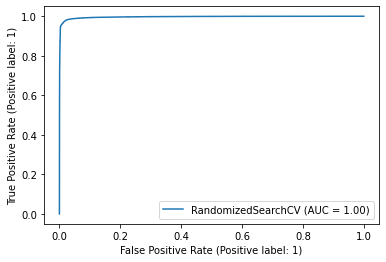

In [46]:
from sklearn import metrics
metrics.plot_roc_curve(final,x_test,y_test)
plt.show()

# Saving Model

In [47]:
import pickle
pickle.dump(final, open('micro_credit', 'wb'))

In [48]:
pickled_model=pickle.load(open('micro_credit', 'rb'))
pickled_model.predict(x_test)

array([0, 1, 1, ..., 0, 0, 1], dtype=int64)